<a href="https://colab.research.google.com/github/yashowardhansinghtomar/Classification-Loan-Prediction/blob/main/Classification_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

### Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# imputation -- fill missing values
married_mode = df['Married'].mode()[0]
df['Married'].fillna(married_mode, inplace=True)
df['Married'].isna().sum()

0

In [ ]:
df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.mean(), inplace=True)
df.Loan_Amount_Term.isna().sum()

0

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<ipython-input-14-14b416e62152>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

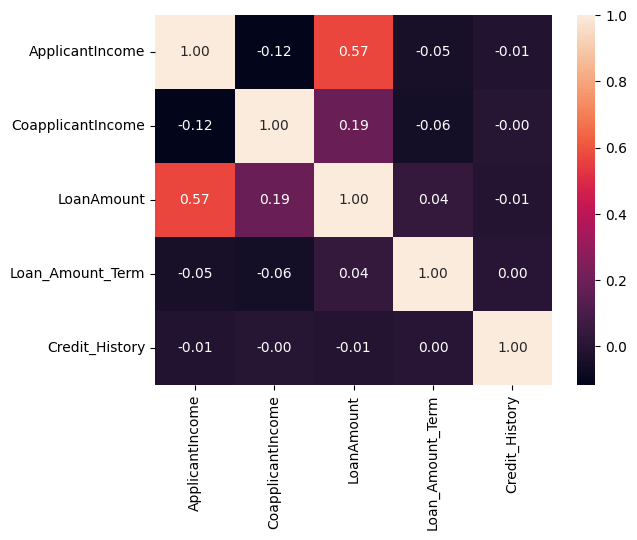

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
df.groupby('Education').LoanAmount.describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,465.0,154.060215,92.883366,9.0,103.0,132.0,176.0,700.0
Not Graduate,127.0,118.409449,39.773636,25.0,96.5,115.0,133.0,279.0


<Axes: xlabel='Education', ylabel='LoanAmount'>

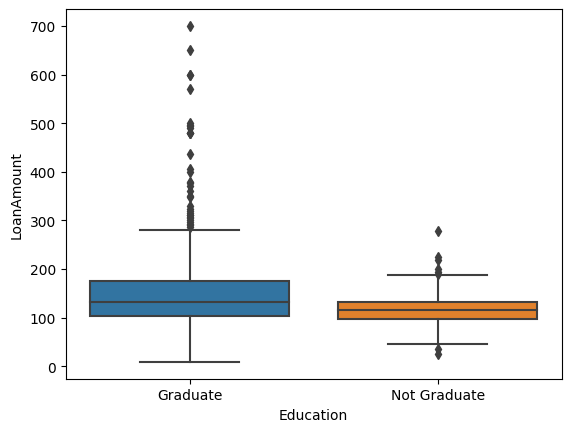

In [ ]:
sns.boxplot(data=df, x='Education', y='LoanAmount')

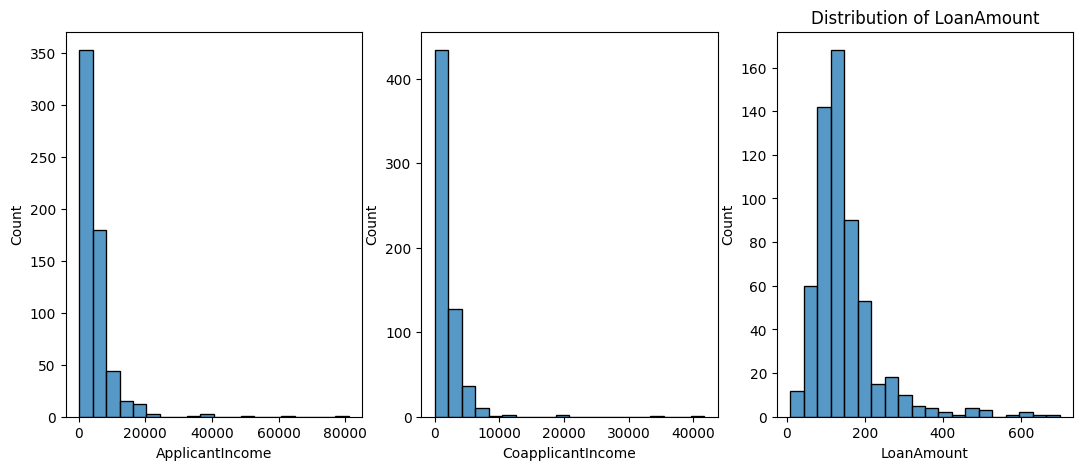

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(13,5))
for index,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']) :
    sns.histplot(data=df, x=col, bins=20, ax=axes[index])
    plt.title(f'Distribution of {col}')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

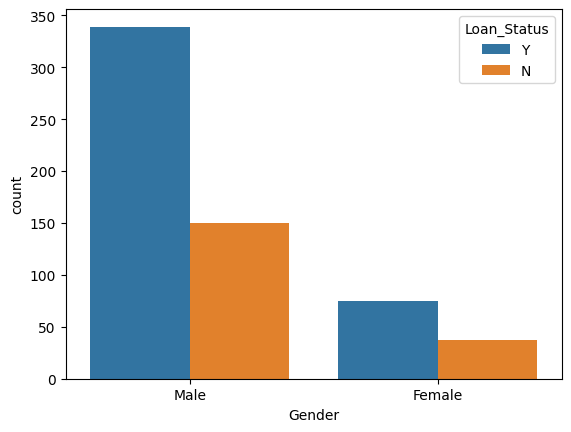

In [ ]:
# bar plot
sns.countplot(x='Gender', hue='Loan_Status', data=df)

In [ ]:
df.groupby('Education').Loan_Status.value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

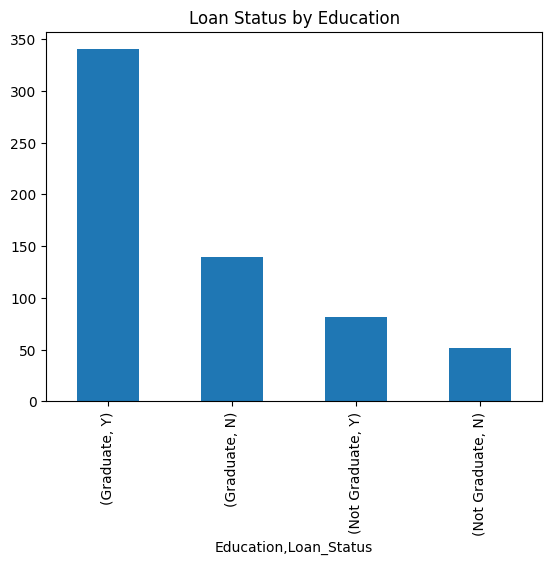

In [ ]:
df.groupby('Education').Loan_Status.value_counts().plot.bar()
plt.title('Loan Status by Education')
plt.show()

In [ ]:
df.groupby('Married').Loan_Status.value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

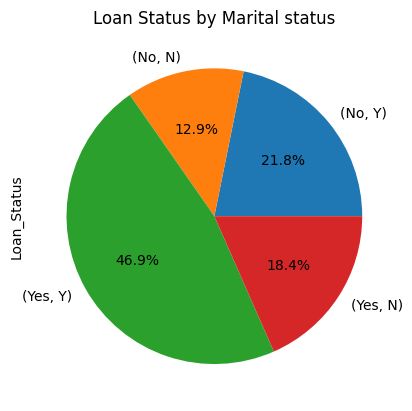

In [ ]:
df.groupby('Married').Loan_Status.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Status by Marital status')
plt.show()

In [ ]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df.groupby('Property_Area')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Property_Area,,,,,,,,
Rural,173.0,152.260116,80.233283,40.0,110.0,133.0,172.0,570.0
Semiurban,228.0,145.504386,81.668261,25.0,100.0,127.5,164.5,600.0
Urban,191.0,142.198953,94.547132,9.0,91.5,120.0,163.0,700.0


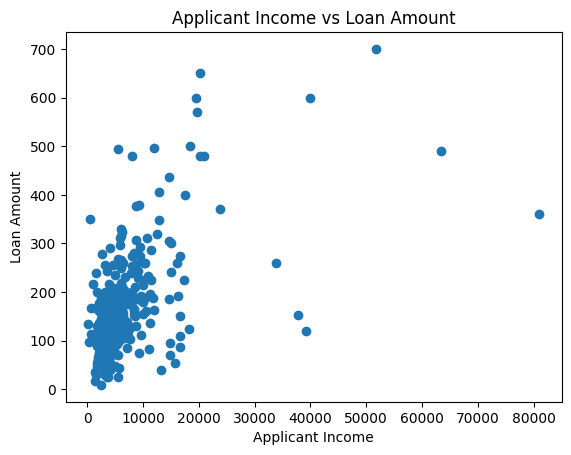

In [ ]:
plt.scatter(df.ApplicantIncome, df.LoanAmount)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()

<Axes: xlabel='Loan_Amount_Term'>

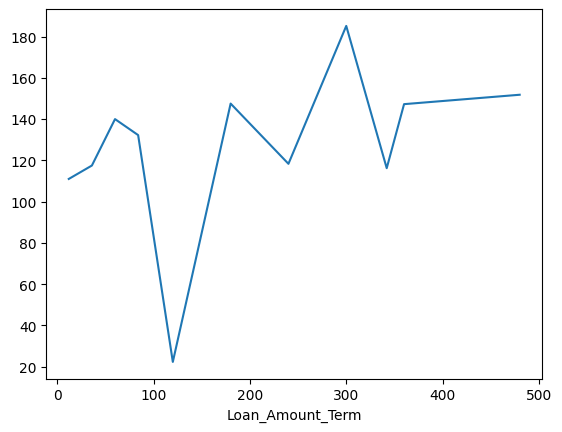

In [ ]:
df.groupby('Loan_Amount_Term').LoanAmount.mean().plot()

In [ ]:
# Select features and target
x = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [ ]:
# Feature engineering
# handle cantegorical features
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
x.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
x = imputer.fit_transform(x)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
pd.DataFrame(x).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

LogisticRegression() :- 	 Accuracy = 0.77
GaussianNB() :- 	 Accuracy = 0.78
DecisionTreeClassifier() :- 	 Accuracy = 0.69
RandomForestClassifier() :- 	 Accuracy = 0.78
KNeighborsClassifier() :- 	 Accuracy = 0.77


In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.83      0.46      0.60        54
           Y       0.77      0.95      0.85       100

    accuracy                           0.78       154
   macro avg       0.80      0.71      0.72       154
weighted avg       0.79      0.78      0.76       154



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 29],
       [ 5, 95]])

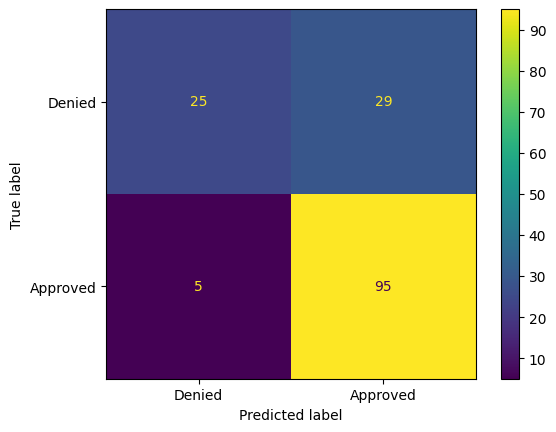

In [ ]:
ConfusionMatrixDisplay(cm, display_labels=['Denied', 'Approved']).plot()